In [1]:
from DLD_Utils import DLD_Utils as utl
from Conv_Base import DLD_Net
from DLD_env import DLD_env, Pillar  
import particle_trajectory as ptj

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan
from shapely import affinity
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

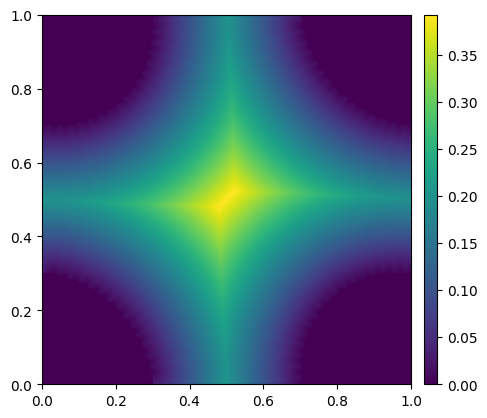

In [3]:
# Step 1: Create a Pillar object (example with circular pillars)
pillar = Pillar(SIZE=0.6, N=10, G_R=1, pillar_type='circle', origin=(0, 0))

# Step 2: Initialize the DLD environment with the Pillar object and Reynolds number
env = DLD_env(pillar=pillar, Re=1, resolution=(200, 200))

# Step 3: Compute and visualize the wall distance
wall_distance_output = env.wall_distance(plot=True)

In [5]:
wall_distance_output.shape

(128, 128)

In [4]:
import pickle
def save_data(data, name='data'):
    with open(name+".pickle", "wb+") as file:
        pickle.dump(data, file)
def load_data(name='data'):
    with open(name+".pickle", "rb") as file:
        return pickle.load(file)

In [7]:
dataset_name = "D_9_160"
dataset = load_data(dataset_name)
u, v = dataset
wall_distance = wall_distance_output.reshape(1, 128, 128) # Shape of dataset_u

In [8]:
dataset = (u, v, wall_distance)
save_data(dataset, 'D_9_160_tryingPT')

In [9]:
dataset_name = "D_9_160_tryingPT"
dataset = load_data(dataset_name)
shape_u = dataset[0].shape  # Shape of dataset_u
shape_v = dataset[1].shape  # Shape of dataset_v
shape_wallD = dataset[2].shape  # Shape of dataset_v
(shape_u, shape_v, shape_wallD)

((1, 128, 128), (1, 128, 128), (1, 128, 128))

In [11]:
dataset_name = "D_9_160_tryingPT"
dataset = load_data(dataset_name)
u, v, w= dataset

In [12]:
#u, v, w, nx, ny = dataset
u = u[0, :, :]
v = v[0, :, :]
w = w[0, :, :]

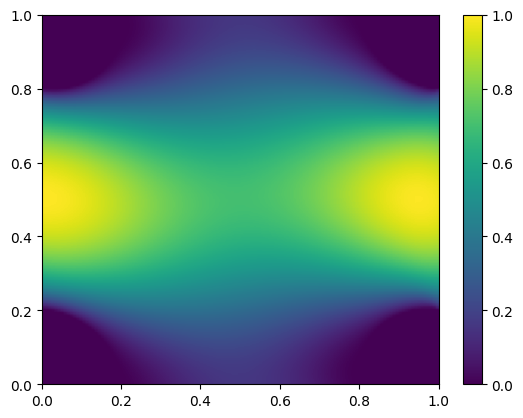

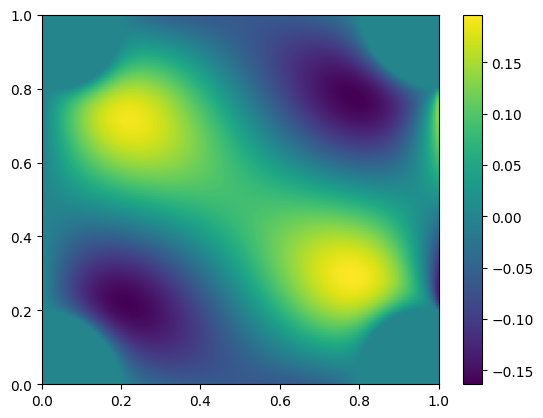

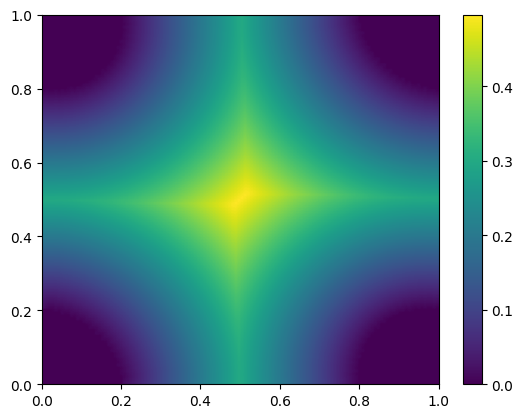

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.flip(u, axis=0), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.flip(v, axis=0), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.flip(w, axis=0), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()

In [5]:
    def gradient(field, dx, dy, recover=False):
    # Gradiant function simply gets a field as input and compute it's gradiant in x and y direction
    # here we used this function in two intences: first, coputing velocity vectors from psi field and
    # determining the normal vectors of pillars from wall distance function
        grad_x = np.gradient(field, dx, axis=1)
        grad_y = np.gradient(field, dy, axis=0)

        if recover:
            grad_x = self.recover_gradient(grad_x)
            grad_y = self.recover_gradient(grad_y)

        
        return grad_x, grad_y
        
    def recover_gradient(u, recover_with=0):
    # this function fill the places in domain where gradiant was not computable 
        sub_u_h = u[:, -3:]
        sub_u_f_h = np.flip(u, axis=1)[:, -3:]
        sub_u_v = u[-3:, :]
        sub_u_f_v = np.flip(u, axis=0)[-3:, :]

        sub_u_h[np.isnan(sub_u_h)] = sub_u_f_h[np.isnan(sub_u_h)]
        sub_u_v[np.isnan(sub_u_v)] = sub_u_f_v[np.isnan(sub_u_v)]

        u[:, -3:] = sub_u_h
        u[-3:, :] = sub_u_v

        u[np.isnan(u)] = recover_with

        return u

In [8]:
    nx, ny = utl.gradient(wall_distance_output, env.dx, env.dy, recover=True)

    dist_mag = np.ma.sqrt(nx**2 + ny**2)
    nx = nx / dist_mag
    ny = ny / dist_mag

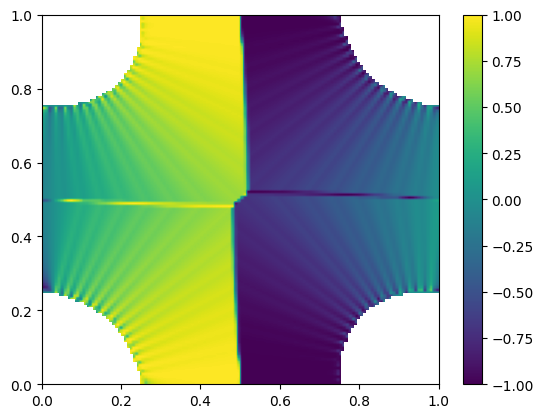

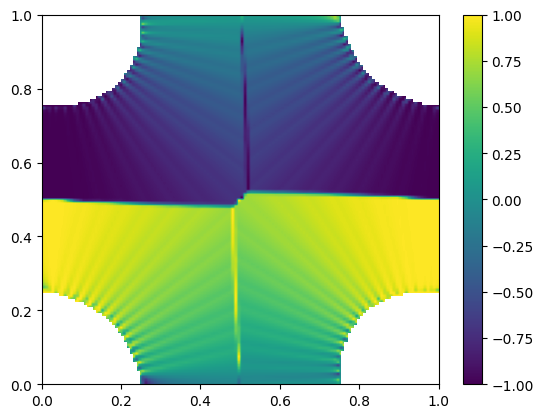

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.flip(nx, axis=0), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.flip(ny, axis=0), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()

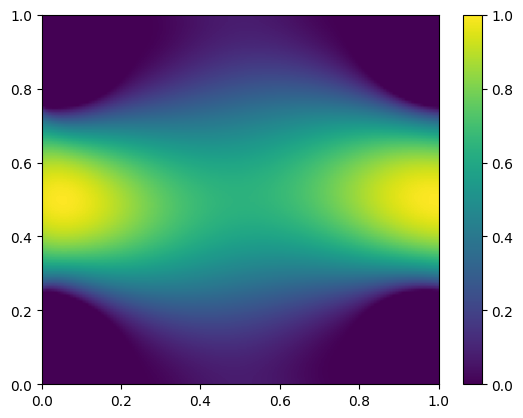

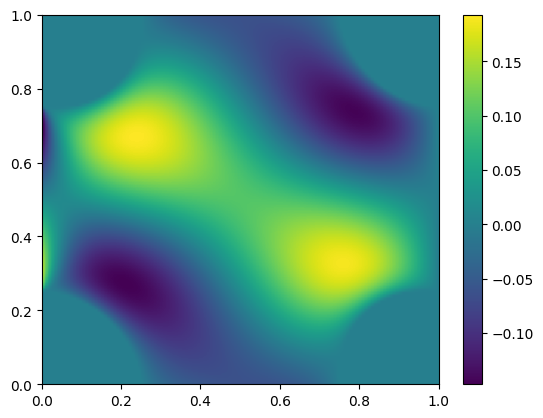

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.flip(u, axis=1), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.flip(v, axis=1), extent=[0, 1, 0, 1], aspect='auto')
plt.colorbar()
plt.show()
plt.figure()

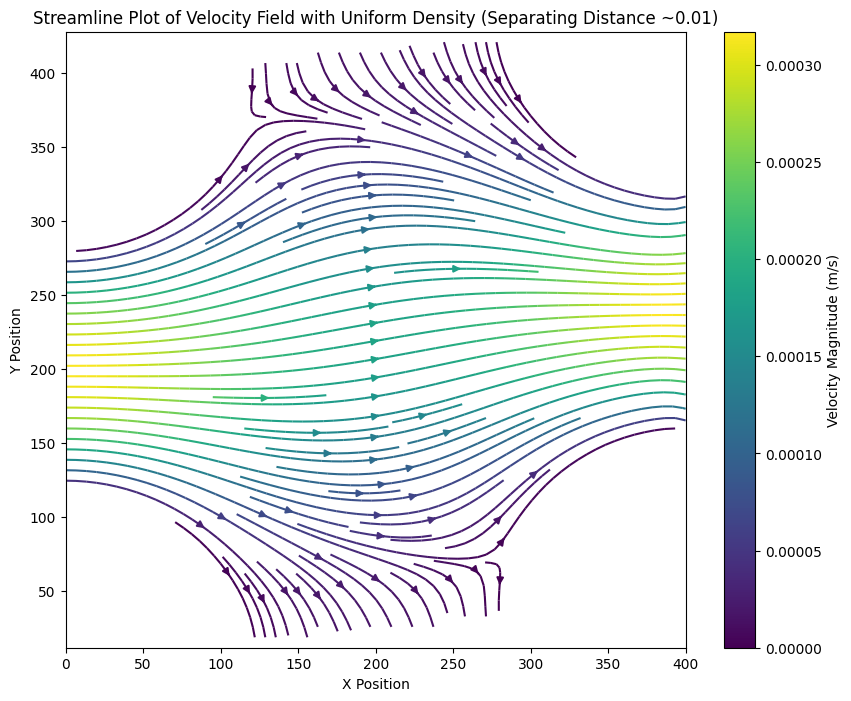

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Plot with density adjustments
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), cmap='viridis', density=2)
plt.title('Streamline Plot of Velocity Field with Uniform Density (Separating Distance ~0.01)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.colorbar(label='Velocity Magnitude (m/s)')
plt.show()
